# **MNIST Hand Written Dataset classification using TensorFlow Keras**
---

## **Load Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import datetime
import platform

In [2]:
# The datetime module provides classes for manipulating dates and times.
now = datetime.datetime.now()
print("Current date and time:", now)

today = datetime.date.today()
print("Today's date:", today)

Current date and time: 2025-04-29 09:05:00.315987
Today's date: 2025-04-29


In [3]:
# The platform module allows you to access underlying platform data, like OS, architecture, processor, etc.
print("System:", platform.system())
print("Machine:", platform.machine())
print("Platform:", platform.platform())
print("Processor:", platform.processor())
print("Python version:", platform.python_version())

System: Linux
Machine: x86_64
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
Processor: x86_64
Python version: 3.11.12


## **Load Data**

In [4]:
mnist_dataset = tf.keras.datasets.mnist
mnist_dataset

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [5]:
(x_train,y_train),(x_test,y_test) = mnist_dataset.load_data()

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
print("Shape of X_trian : ",x_train.shape)
print("Shape of Y_trian : ",y_train.shape)
print("Shape of X_test : ",x_test.shape)
print("Shape of Y_test : ",y_test.shape)

Shape of X_trian :  (60000, 28, 28)
Shape of Y_trian :  (60000,)
Shape of X_test :  (10000, 28, 28)
Shape of Y_test :  (10000,)


The **training** dataset consists of `60000 28x28 px` images of hand-written digits from `0` to `9`.

The **test** dataset consists of `10000 28x28 px` images.

In [8]:
print("Train Digit Labels are : ", np.unique(y_train))
print("Test Digit Labels are : ", np.unique(y_test))

Train Digit Labels are :  [0 1 2 3 4 5 6 7 8 9]
Test Digit Labels are :  [0 1 2 3 4 5 6 7 8 9]


## **Visualisation**

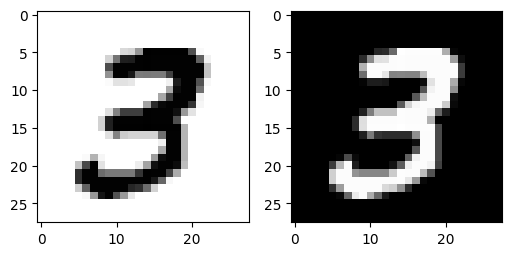

In [9]:
plt.figure(figsize=(6,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(x_train[7],cmap=plt.cm.binary)
ax2.imshow(x_train[7],cmap='gray')
plt.show()

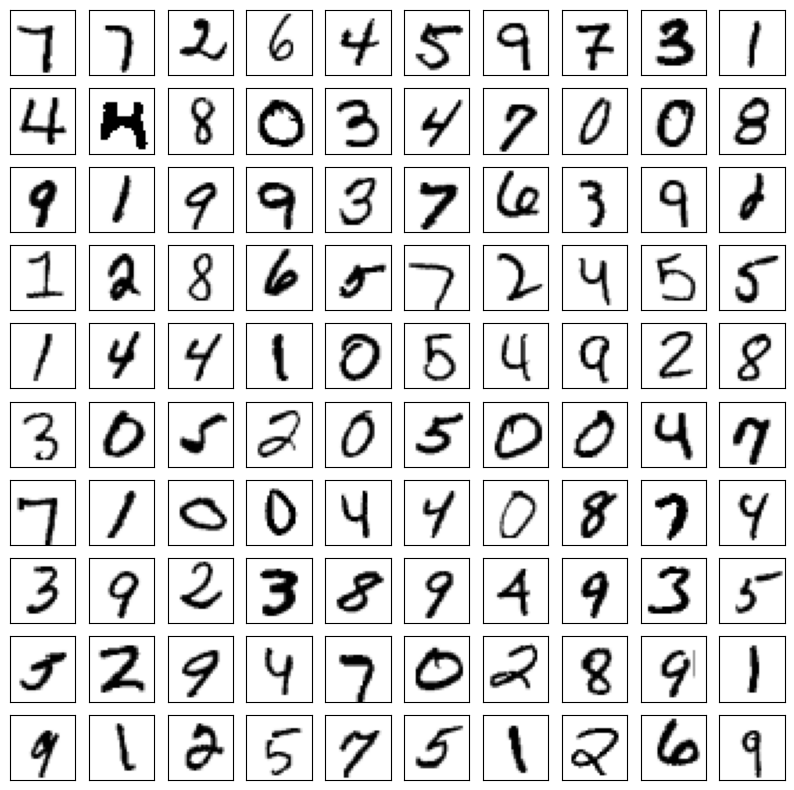

In [10]:
n = np.random.randint(0,x_train.shape[0],100) # 100 random no. from training dataset size

num_cells = math.ceil(math.sqrt(len(n))) # sqrt of 100 i.e 10

plt.figure(figsize=(10,10))

for i in range(len(n)):
  plt.subplot(num_cells,num_cells,i+1)
  plt.imshow(x_train[n[i]],cmap=plt.cm.binary)
  plt.xticks([])  # remove x ticks
  plt.yticks([])

plt.show()

## **Normalize**

As the color map ranges from 0 to 255, if we divide all by 255, we get a range of 0 to 1.

`Before Normalization`

In [11]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

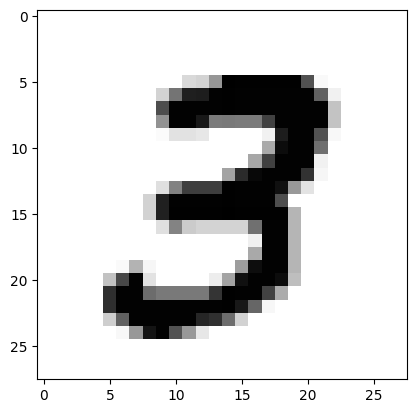

In [12]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap = plt.cm.binary)
plt.show()

`After Normalization`

In [13]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [14]:
x_train_normalized.min(), x_train_normalized.max()

(np.float64(0.0), np.float64(1.0))

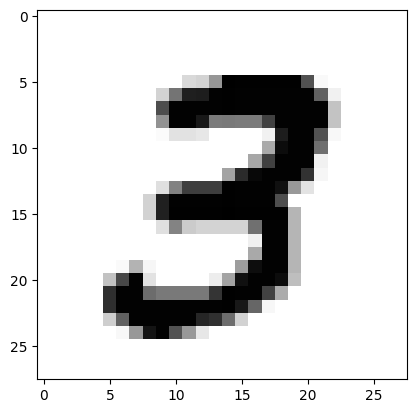

In [15]:
plt.figsize = (6,6)
plt.imshow(x_train_normalized[7], cmap = plt.cm.binary)
plt.show()

## **Build The Model**

we will use Sequntial Keras model with 4 Layers:
  - Layer 1 : Flatten layer, that will flatten 2D image matrix into 1D vector
  - Layer 2 : Input Dense Layer with 128 neurons and ReLU activation
  - Layer 3 : Hidden Dense Layer with 128 neurons and ReLU activation
  - Layer 4 : Output Dense Layer with 10 neurons and Softmax activation,
              The Output represents the network's guess.
              The 0-th output represents a probability that the input digit is `0`,
              the 1-st output represents a probability that the input digit is `1` and so on...
In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. `Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).`

In [31]:
model = tf.keras.models.Sequential() # gives the linear stack of layers -> model object

THe code is describing the purpose of the `Sequential` model in Keras. Let’s break it down:

### 1. **`tf.keras.models.Sequential`**:
- `Sequential` is a class in the **Keras** API that represents a **linear stack of layers**.
- In simpler terms, a **Sequential model** means the layers are added **one after the other** (in a linear order).
- You add layers to the model sequentially, and the output of one layer is fed as the input to the next layer. There is no branching or complex architectures (like in functional models or models with multiple inputs/outputs).

### 2. **`gives the linear stack of layers`**:
- The term "linear stack of layers" simply refers to a structure where you sequentially add layers in a straight line.
- **Example**: If you add a `Flatten` layer, followed by a `Dense` layer, followed by another `Dense` layer, it is just a **stacked arrangement** of these layers.

### 3. **`model object`**:
- This is referring to the fact that `Sequential` is a **model object**. Once you instantiate it (`model = tf.keras.models.Sequential()`), it becomes a model that you can then use to add layers and train the network.

In [32]:
model

<Sequential name=sequential_1, built=False>

In [35]:
from tensorflow.keras import regularizers

In [36]:
# Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train_normalized.shape[1:]))

# 1st Hidden Layer
model.add(tf.keras.layers.Dense( units = 128,
                                 activation = tf.keras.activations.relu,
                                 kernel_regularizer=regularizers.l2(0.01) ))

# 2nd Hidden Layer
model.add(tf.keras.layers.Dense( units = 128,
                                 activation = tf.keras.activations.relu,
                                 kernel_regularizer=regularizers.l2(0.01) ))

# Output Layer
model.add(tf.keras.layers.Dense( units = 10,
                                 activation = tf.keras.activations.softmax))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Compile The Model**

In [38]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
# normally adam uses learning rate = 0.001

In [39]:
model.compile(optimizer = adam_optimizer,
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

## **Train The Model**

In [41]:
training_history = model.fit(x_train_normalized, y_train, epochs = 20, validation_data = (x_test_normalized,y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8194 - loss: 1.1067 - val_accuracy: 0.8641 - val_loss: 0.7408
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8647 - loss: 0.7273 - val_accuracy: 0.8787 - val_loss: 0.6682
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8666 - loss: 0.7003 - val_accuracy: 0.8940 - val_loss: 0.6018
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8724 - loss: 0.6921 - val_accuracy: 0.8820 - val_loss: 0.6476
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8744 - loss: 0.6662 - val_accuracy: 0.8601 - val_loss: 0.6879
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8701 - loss: 0.6644 - val_accuracy: 0.8839 - val_loss: 0.6156
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8728 - loss: 0.6567 - val_accuracy: 0.8540 - val_loss: 0.6942
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8719 - loss: 